# **Analysis for one trial**

## This analysis script is for a single trial.

load modules

In [1]:
%load_ext autoreload

%autoreload 2
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
from spikeA.Session import *
from spikeA.Spike_train_loader import Spike_train_loader
from spikeA.Cell_group import Cell_group
from spikeA.Animal_pose import Animal_pose
from spikeA.Session import Session

set session name

In [2]:
## extract HD cells, for decoding
# name="pk3864-07022022-0109"
# name="pk3864-09022022-0109"
name = "pk3864-10022022-0101"
name = "pk3864-23022022-0101"

## first trials, for screening
# name="pk3855-21022022-0101"
# name="pk3855-22022022-0101"
# name="pk3855-23022022-0101"
# name="pk3855-24022022-0101"
# name="pk3855-25022022-0101"
# name="pk3856-08032022-0101"

# name="pk3864-14032022-0101"
# name="pk3856-14032022-0101"
# name="bt64245-14032022-0101"
# name="bt64245-15032022-0101"
# name="pk3864-21032022-0101" # check
# name="pk3864-22032022-0101"
# name="pk3864-23032022-0101"
# name="pk3864-24032022-0101"
# name="pk3864-28032022-0101"

# name="pk3921-31032022-0101"
# name="pk3921-01042022-0101"
# name="pk3921-04042022-0101"
# name="pk3921-05042022-0101"
# name="pk3921-06042022-0101"
# name="pk3921-07042022-0101"
# name="pk3921-08042022-0101"
# name="pk3924-11042022-0101"
# name="pk3924-12042022-0101"
# name="pk3924-13042022-0101"

name="pk3190-03052022-0101"

name="pk3190-04052022-0101_A"
name="pk3192-04052022-0101_A"
name="pk3190-04052022-0101_B"
name="pk3192-04052022-0101_B"

name="pk3190-05052022-0101_A"
#name="pk3192-05052022-0101_A"
#name="pk3192-05052022-0101_B"
name="pk3190-05052022-0101_B"


name="pk3190-09052022-0101"
name="pk3192-09052022-0101"

name="pk3190-10052022-0101"

name="pk3192-13052022-0101"
name="pk3190-13052022-0101"

name="pk3190-16052022-0101_A"
name="pk3190-16052022-0101_B"

name="pk3190-17052022-0101"
name="pk3192-17052022-0101"

name="pk3192-18052022-0101"

name="pk3192-19052022-0101"
name="pk3190-19052022-0101"

name="pk3190-24052022-0101"
name="pk3192-24052022-0101"

# name="pk3190-24052022-0103" # HD decode trial 1,2,3

# more screening for grid / HD cells in pk3190 and HD cells in pk3192

name="pk3190-30052022-0101_A"
name="pk3190-30052022-0101_B"

name="pk3192-30052022-0101_A"
name="pk3192-30052022-0101_B"
name="pk3192-31052022-0101_A"
name="pk3192-31052022-0101_B"

name="pk3190-01062022-0101"

name="pk3192-01062022-0101_A"
name="pk3192-01062022-0101_B"

name="pk3190-02062022-0101"
#name="pk3192-02062022-0101"


name="pk3190-04062022-0101"
#name="pk3190-05062022-0101"

name="pk3190-08062022-0101_A"
name="pk3190-08062022-0101_B"

name="tyy8977-23062022-0101_A"
name="tyy8977-23062022-0101_B"
name="tyy8977-24062022-0101"


name="pk6267-28062022-0101_A"
name="pk6267-28062022-0101_B"

name="pk6267-29062022-0101_A"
name="pk6267-29062022-0101_B"
name="pk6267-29062022-0101_C"

name="pk6266-30062022-0101"

name="pk6267-30062022-0101_A"
name="pk6267-30062022-0101_B"

name="pk6267-04072022-0101"

name="pk6267-05072022-0101_A"
name="pk6267-05072022-0101_B"
name="pk6267-05072022-0101_C"
name="pk6267-05072022-0101_D"

name="pk6267-06072022-0101"

##

name="pk6273-20072022-0101"
name="pk6266-09072022-0105"

name="bt1009-24102021-0105"

##

name="pk6276-11082022-0101_A"
name="pk6276-11082022-0101_B"
name="pk6276-12082022-0101_A"
name="pk6276-12082022-0101_B"

#
name="pk10486-16082022-0101_A"
name="pk10486-16082022-0101_B"

name="pk10486-17082022-0101_A"
name="pk10486-17082022-0101_B"
name="pk10486-18082022-0101"
name="pk10486-19082022-0101_A"
name="pk10486-19082022-0101_B"
name="pk10486-22082022-0101"
name="pk10486-23082022-0101_B"
name="pk10486-24082022-0101"

###
# (jingjie - analysis)
# name="pk6266-09072022-0105" # incoherent HD re-anchoring
# name="pk6275-19082022-0109" # 3-modal HD cell

# 
name="pk10486-26082022-0101"
# name="pk10454-14092022-0101"

name="pk10486-25082022-0105"

name="pk10454-15092022-0101_A"
#name="pk10454-15092022-0101_B"


Check the path

In [3]:
import os

basedir = "/adata/electro"
subject, session = name.split("-",1)
path = basedir+"/"+subject+"/"+name+"/"

fname = name.split("_")[0]

print("Path:", path)
print("Mouse:", subject) # directory = mouse subject name
print("Session:", session)
print("Name:", name, ",", fname)
print("")
print("Path:", "OK" if os.path.isdir(path) else "invalid")

Path: /adata/electro/pk10454/pk10454-15092022-0101_A/
Mouse: pk10454
Session: 15092022-0101_A
Name: pk10454-15092022-0101_A , pk10454-15092022-0101

Path: OK


## Get a Session object

Check the files

In [4]:
ses = Kilosort_session(name=fname, path=path)
ses.load_parameters_from_files(ignore_params=True)  # ignore_params if kilosort has not been executed so far
print(ses)

<class 'spikeA.Session.Kilosort_session'>
name = pk10454-15092022-0101
path = /adata/electro/pk10454/pk10454-15092022-0101_A
subject = pk10454
session_dat_time = 2022-09-15 01:01:00
fileBase = /adata/electro/pk10454/pk10454-15092022-0101_A/pk10454-15092022-0101
data_type = kilosort
file_names = {'par': '/adata/electro/pk10454/pk10454-15092022-0101_A/pk10454-15092022-0101.par', 'desen': '/adata/electro/pk10454/pk10454-15092022-0101_A/pk10454-15092022-0101.desen', 'desel': '/adata/electro/pk10454/pk10454-15092022-0101_A/pk10454-15092022-0101.desel', 'sampling_rate': '/adata/electro/pk10454/pk10454-15092022-0101_A/pk10454-15092022-0101.sampling_rate_dat', 'stimulation': '/adata/electro/pk10454/pk10454-15092022-0101_A/pk10454-15092022-0101.stimulation', 'px_per_cm': '/adata/electro/pk10454/pk10454-15092022-0101_A/pk10454-15092022-0101.px_per_cm', 'setup': '/adata/electro/pk10454/pk10454-15092022-0101_A/pk10454-15092022-0101.setup', 'environmentFamiliarity': '/adata/electro/pk10454/pk10454-

## Load spikes

In [5]:
stl = Spike_train_loader()
stl.load_spike_train_kilosort(ses)#, only_good=False)
print("stl.clu_ids",len(stl.clu_ids), stl.clu_ids)
cg = Cell_group(stl)

stl.clu_ids 20 [ 9 35 36 37 41 42 51 53 54 56 60 62 64 65 67 71 74 75 77 78]


## Load the waveforms

Set the waveform and channel information from the session template file.

In [6]:
cg.set_info_from_session(ses, maxchannels=5)

Templates: 75 , timepoints: 82 , Channels: 64
Loaded templates-clusters-map, spikes: 238856 , clusters: 69
Init shanks: 8


For each cluster, print the active channels where the spikes were detected, and the corresponding brain area.

In [7]:
unique, counts = np.unique([ '/'.join(n.brain_area) for n in cg.neuron_list ] , return_counts=True )

for u,c in zip(unique, counts):
    print(u,":",c)

adn : 3
mec : 17


## Create a pose file 

In [8]:
ap = Animal_pose(ses)
posefilename = ses.fileBase + ap.pose_file_extension
print("look for", posefilename)
if not os.path.exists(posefilename):
    print("load from positrack")
    extension = ap.positrack_type()
    print("use extension:",extension)
    ap.pose_from_positrack_files(ses=ses, interpolation_frequency_hz = 50, extension=extension)
    ap.save_pose_to_file() # save the file for next time
else:
    print("load from saved pose file")
    ap.load_pose_from_file()

look for /adata/electro/pk10454/pk10454-15092022-0101_A/pk10454-15092022-0101.pose.npy
load from positrack
use extension: positrack
Interpolation step: 400.0 samples
/adata/electro/pk10454/pk10454-15092022-0101_A/pk10454-15092022_01.dat
/adata/electro/pk10454/pk10454-15092022-0101_A/pk10454-15092022_01.positrack
Getting ttl pulses time from /adata/electro/pk10454/pk10454-15092022-0101_A/pk10454-15092022_01.ttl_up.npy
Number of ttl pulses detected: 60312
Number of lines in positrack file: 60311
start tracking at: 1.9013 sec
last ttl to end of dat file duration: 1.8315 sec
!!!
alignment problem
!!!
1 more ttl pulses than video frames
first ttl sample: 38025
last ttl sample: 24871770
samples in dat file: 24908400
Missing lines: 1
Number of lines in adjusted positrack file: 60312
Alignment problem solved by adding 1 ttl pulses to positrack
hdRange: 359.98
degree to radian transformation
Invalid values: 650
Valid values: 59662
Percentage of invalid values: 1.08%
transforming pixels to cm wi

In [9]:
np.rad2deg(np.nanmax(ap.pose[:,4]) - np.nanmin(ap.pose[:,4]))

359.9941496334332

In [9]:
ap.invalid_ratio()

0.011228000856093908

In [10]:
ses.trial_intervals.inter

array([[   0.     , 1214.81995]])

In [11]:
ses.trial_intervals.inter[0]

array([   0.     , 1214.81995])

In [12]:
#~ ap.pose[:,[1,2]]=xypos

In [13]:
arena, diameter, *_ = ses.session_trials()[0][3]
print("arena:", arena)
print("diameter:", diameter)

# diameter=70.
# arena="square"

arena: square
diameter: 70.0


In [14]:
# find good shape automagically & crop

xy_range=ap.find_xy_range(diameter=diameter)
xyrange_min,xyrange_max=xy_range
xmean,ymean = ap.meanloc
center = np.mean(xy_range, axis=0)
print("xmean,ymean",xmean,ymean)
print("xyrange_min,xyrange_max",xyrange_min,xyrange_max)
print("center", center)

xmean,ymean 46.746835684169774 58.80704942952974
xyrange_min,xyrange_max [11.74683568 23.80704943] [81.74683568 93.80704943]
center [46.74683568 58.80704943]


Plot the path of the animal to see if it was loaded correctly.

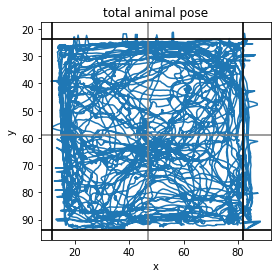

In [15]:
plt.plot(ap.pose[:,1],ap.pose[:,2])
plt.xlabel("x")
plt.ylabel("y")
#plt.scatter([xmean],[ymean], color="black", s=20)
plt.axvline(x=xmean, color="gray")
plt.axhline(y=ymean, color="gray")
plt.axvline(x=xmean+diameter/2, color="gray")
plt.axhline(y=ymean+diameter/2, color="gray")
plt.axvline(x=xmean-diameter/2, color="gray")
plt.axhline(y=ymean-diameter/2, color="gray")

plt.axvline(x=xyrange_min[0], color="black")
plt.axvline(x=xyrange_max[0], color="black")
plt.axhline(y=xyrange_min[1], color="black")
plt.axhline(y=xyrange_max[1], color="black")

plt.gca().invert_yaxis()
plt.gca().set_aspect('equal', adjustable='box')
plt.title("total animal pose")
plt.show()

Plot the occupancy map to see where the animal spent more or less time.

(The image seems mirrored since the x/y-axis for imshow is different compared to the plot function.)

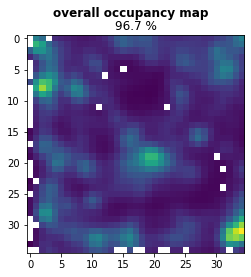

In [16]:
ap.occupancy_map_2d(xy_range=xy_range)
plt.imshow(ap.occupancy_map.T)
plt.suptitle("overall occupancy map", fontweight='bold')
plt.title("{:.1f} %".format(100*ap.occupancy(arena=arena)))
plt.show()

Plot the head-direction of the animal and its position a short segment.

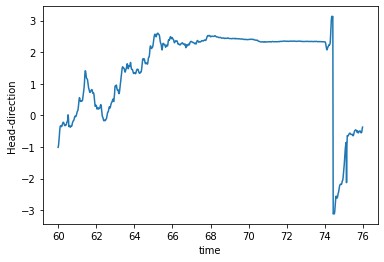

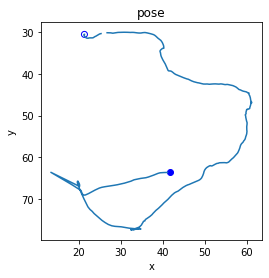

In [17]:
s=3000#3500#3000
e=3800

plt.plot(ap.pose[s:e,0], ap.pose[s:e,4])
plt.xlabel("time")
plt.ylabel("Head-direction")
plt.show()

plt.plot(ap.pose[s:e,1],ap.pose[s:e,2])
plt.scatter([ap.pose[s,1]],[ap.pose[s,2]], facecolors='none', edgecolors='b')
plt.scatter([ap.pose[e,1]],[ap.pose[e,2]], facecolors='b', edgecolors='b')
plt.gca().set_aspect('equal', adjustable='box')
plt.gca().invert_yaxis()
plt.xlabel("x")
plt.ylabel("y")
plt.title("pose")
plt.show()

/home/pascal/repo/spikeA/spikeA/Animal_pose.py:173: RuntimeWarning: invalid value encountered in true_divide
  mvVectors = mvVectors/ mvLength # after this are unitary vectors


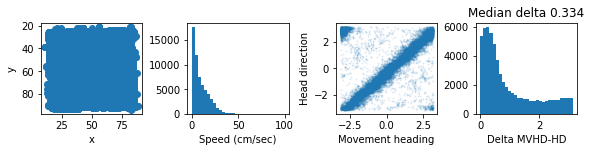

In [18]:
ap.test_head_direction_heading_correlation(plot=True)

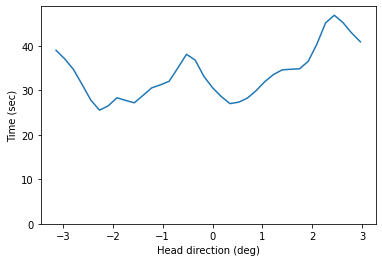

In [19]:
ap.head_direction_occupancy_histogram()
plt.plot(ap.hd_occupancy_bins[:-1],ap.hd_occupancy_histogram)
plt.ylim(0,np.max(ap.hd_occupancy_histogram)+2)
plt.ylabel("Time (sec)")
plt.xlabel("Head direction (deg)")
plt.show()

#### filter data

In [20]:
#~ ap.invalid_outside_spatial_area(shape=arena, center=center, length=diameter)

In [21]:
np.sum(np.isfinite(ap.pose), axis=0)

array([60741, 60065, 60065,     0, 60542,     0,     0])

In [22]:
ap.interpolate_pose()

In [23]:
ap.pose_at_time([42,7.7,1,1,1,1,1,1])

array([[36.55540356, 75.16509742,         nan,         nan,         nan,
                nan,         nan,         nan],
       [88.073087  , 34.70162717,         nan,         nan,         nan,
                nan,         nan,         nan],
       [ 2.46649272,  0.31024127,         nan,         nan,         nan,
                nan,         nan,         nan]])

In [24]:
time = ap.pose[:,0]
time

array([0.00000e+00, 2.00000e-02, 4.00000e-02, ..., 1.21476e+03,
       1.21478e+03, 1.21480e+03])

In [25]:
xvals,yvals = ap.pose[:,1],ap.pose[:,2]

In [26]:
xvals.shape,yvals.shape

((60741,), (60741,))

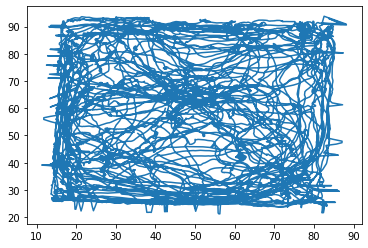

In [27]:
plt.plot(xvals,yvals)

In [28]:
from scipy.signal import medfilt


In [29]:
dtime = np.diff(time)[0]

In [30]:
windowlen_sec = .25 # 0.5
windowlen_ind = (int(windowlen_sec/dtime) // 2) * 2  + 1 # odd number
print("windowlen_ind", windowlen_ind)

windowlen_ind 13


In [31]:
xvals_ = medfilt(xvals, windowlen_ind)
yvals_ = medfilt(yvals, windowlen_ind)

In [32]:
ap.pose[:,1] = xvals_
ap.pose[:,2] = yvals_
ap.speed_from_pose()

(1000.0, 1200.0)

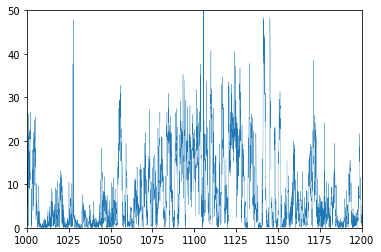

In [33]:
plt.plot(ap.pose[:,0], ap.speed, lw=.3)
plt.ylim(0,50)
#plt.xlim(50,100)
plt.xlim(1000,1200)

In [34]:
xypos = np.transpose([xvals_,yvals_])
xypos.shape

(60741, 2)

In [35]:
xvals_.shape,yvals_.shape

((60741,), (60741,))

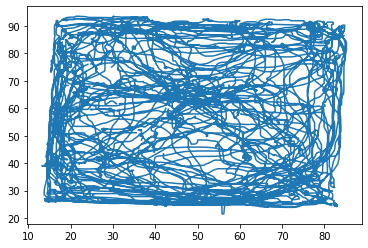

In [36]:
plt.plot(xvals_,yvals_)

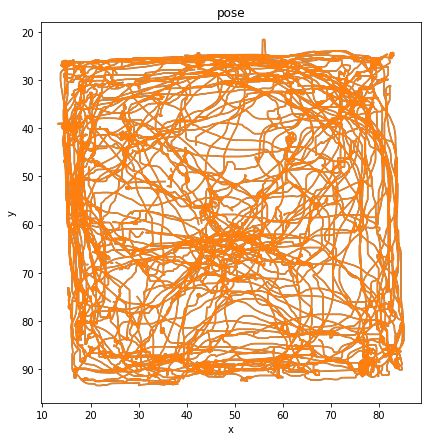

In [37]:
#plt.xlim((50,80))
#plt.ylim((30,50))

plt.figure(figsize=(7,7))

plt.plot(xvals,yvals)
plt.plot(xvals_,yvals_)
plt.xlabel("x")
plt.ylabel("y")
plt.gca().invert_yaxis()
plt.gca().set_aspect('equal', adjustable='box')
plt.title("pose")
plt.show()

In [38]:
np.sum(np.isfinite(xvals)), np.sum(np.isfinite(xvals_))

(60128, 60128)

In [39]:
np.sum(np.isfinite(yvals)), np.sum(np.isfinite(yvals_))

(60115, 60115)

In [40]:
speed_vector = np.diff(xypos, axis=0, append=np.nan) / dtime
moving_direction = np.arctan2(speed_vector[:,1], speed_vector[:,0])
speed = np.linalg.norm(speed_vector, axis=1)


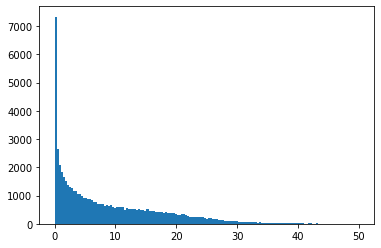

In [41]:
speed[speed>100]=np.nan
plt.hist(speed,bins=np.linspace(0,50,150))
plt.show()

In [42]:
new_hd = ap.pose[:,4]

#~ new_hd=new_hd+np.pi/2
#~ new_hd[new_hd>=np.pi]=new_hd[new_hd>=np.pi]-2*np.pi
#~ 
new_hd=-new_hd

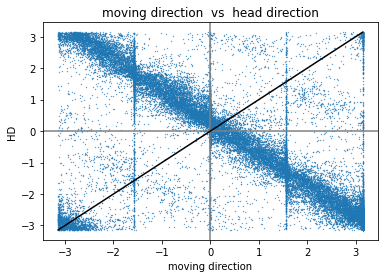

In [43]:
plt.scatter(moving_direction[speed>5], new_hd[speed>5], s=.1)
plt.axvline(x=0, color='grey')
plt.axhline(y=0, color='grey')
plt.plot([-np.pi,+np.pi],[-np.pi,+np.pi], color='black')
plt.xlabel("moving direction")
plt.ylabel("HD")
plt.title("moving direction  vs  head direction")
plt.show()

(array([ 4062.,  3266.,  8463.,  3307., 12266.,  3616.,  3183.,  8663.,
         3296.,  9727.]),
 array([-3.14145511e+00, -2.51315034e+00, -1.88484556e+00, -1.25654078e+00,
        -6.28236007e-01,  6.87701454e-05,  6.28373547e-01,  1.25667832e+00,
         1.88498310e+00,  2.51328788e+00,  3.14159265e+00]),
 <BarContainer object of 10 artists>)

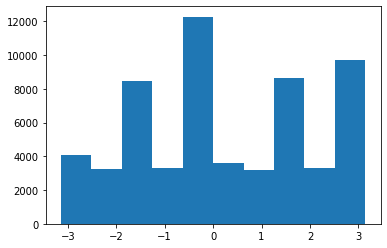

In [44]:
plt.hist(moving_direction)

## Overview

In [45]:
#
iv=ses.trial_intervals.inter
#iv=np.array([0.,1200.])
#iv=np.array([0.,1500.])
#iv=ses.trial_intervals.inter[0]

In [46]:
print("use interval",iv)

use interval [[   0.      1214.81995]]


i 0 / n 27
i 1 / n 36
i 2 / n 38
i 3 / n 39
i 4 / n 42
i 5 / n 43
GC mec
i 6 / n 46
GC mec
i 7 / n 49
GC mec
i 8 / n 50
GC mec
i 9 / n 51
GC mec
i 10 / n 63
i 11 / n 70
i 12 / n 71


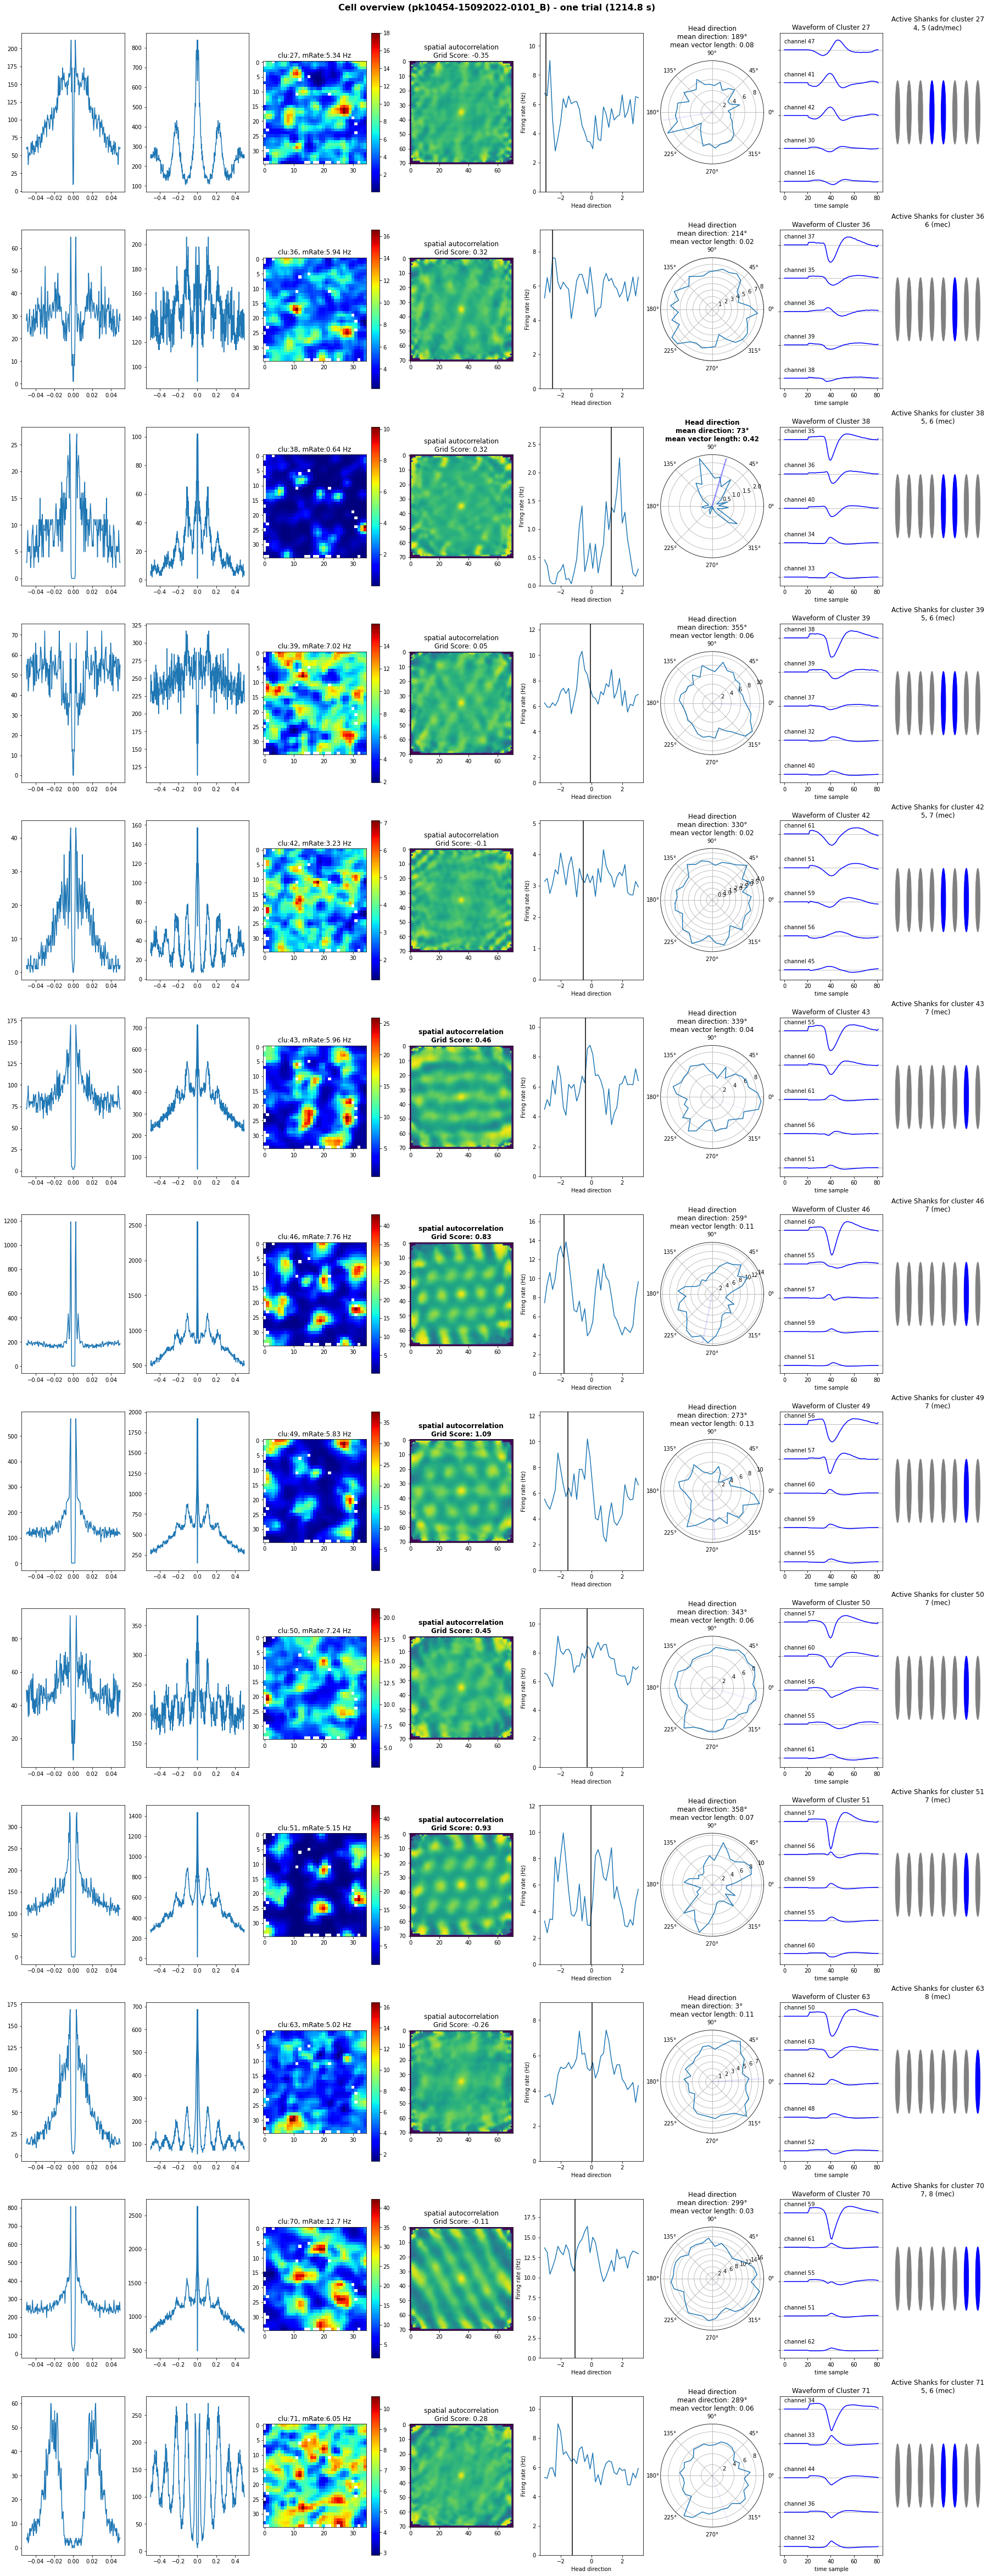

In [47]:
hd_firing_list=[] # neurons tuning curve
hd_ifr_list=[] # ifr list
spike_trains = [] # spike trains


# from matplotlib.patches import Rectangle

cols = 8

fig, axs = plt.subplots(len(cg.neuron_list), cols, figsize=(25, 5*len(cg.neuron_list)), squeeze=False, constrained_layout=True)
   
for i, n in enumerate(cg.neuron_list):
    
    # first interval only
    # iv = ses.trial_intervals.inter[0]
    # iv = np.array([iv])
    # custom interval (first 20min of light-dark-protocol -> light baseline)
    # iv=np.array([0.,1200.])
    #iv=np.array([6000.,7200.]) # last 20mins
    #iv=light_intervals
    # iv=np.array(first_block)

    # reset and set intervals
    n.spike_train.unset_intervals()
    ap.unset_intervals()
    n.spike_train.set_intervals(iv)
    ap.set_intervals(iv)
    
    n.set_spatial_properties(ap)
    
    print("i",i,"/","n",n.name)
    #print("n",n.spike_train.intervals.total_interval_duration_seconds())
    #print("ap",ap.intervals.total_interval_duration_seconds())
    
    
    
    # temporal auto-correlation
      
    n.spike_train.spike_time_autocorrelation(bin_size_sec=0.0005,min_sec=-0.05, max_sec=0.05)
    timestamp = n.spike_train.mid_point_from_edges(n.spike_train.st_autocorrelation_histogram[1])
    axs[i,0].plot(timestamp, n.spike_train.st_autocorrelation_histogram[0])
    
    n.spike_train.spike_time_autocorrelation(bin_size_sec=0.0025,min_sec=-0.5, max_sec=0.5)
    timestamp = n.spike_train.mid_point_from_edges(n.spike_train.st_autocorrelation_histogram[1])
    axs[i,1].plot(timestamp, n.spike_train.st_autocorrelation_histogram[0])
    
    
    # clear intervals
    
    # n.spike_train.unset_intervals()
    # ap.unset_intervals()
    # n.spike_train.set_intervals(ses.trial_intervals.inter)
    # ap.set_intervals(ses.trial_intervals.inter)
    
    # spatial firing map 
    
    n.set_spatial_properties(ap)
    n.spatial_properties.firing_rate_map_2d(cm_per_bin =2, smoothing_sigma_cm = 2, smoothing=True, xy_range=xy_range) # xy_range
    im = axs[i,2].imshow(n.spatial_properties.firing_rate_map.T,cmap='jet')
    axs[i,2].set_title("clu:{}, mRate:{:.3} Hz".format(n.name,n.spike_train.mean_firing_rate()))
    fig.colorbar(im,ax=axs[i,2])
    
    
    # Spatial autocorrelation Map & Grid Score
    gs = n.spatial_properties.grid_score()
    
    fw = "bold" if gs>.4 else "normal"
    
    axs[i,3].imshow(n.spatial_properties.spatial_autocorrelation_map)
    axs[i,3].set_title("spatial autocorrelation"+"\n"+"Grid Score: "+str(round(gs,2)), fontweight=fw)
    
    # Head direction
    
    n.spatial_properties.firing_rate_head_direction_histogram(smoothing=False)
    
    angles = n.spatial_properties.mid_point_from_edges(n.spatial_properties.firing_rate_head_direction_histo_edges)
    hd_firing = n.spatial_properties.firing_rate_head_direction_histo
    hd_mean_direction_rad, hd_mean_direction_deg, hd_mean_vector_length, hd_peak_angle_rad, hd_peak_rate = n.spatial_properties.head_direction_score()
    
    axs[i,4].plot(angles, hd_firing)
    axs[i,4].set_xlabel("Head direction")
    axs[i,4].set_ylabel("Firing rate (Hz)")
    axs[i,4].set_ylim(0, np.nanmax(n.spatial_properties.firing_rate_head_direction_histo)*1.2+0.1)
    axs[i,4].axvline(x=hd_mean_direction_rad, color="black")
    #axs[i,4].text(s=str(round(hd_mean_direction_rad*180./np.pi))+" ° (vector length = "+str(hd_mean_vector_length)+")",x=hd_mean+.1,y=1)
    
    fw = "bold" if hd_mean_vector_length>.4 else "normal"
    axs[i,5].axis('off')
    ax2 = fig.add_subplot(len(cg.neuron_list), cols, cols*i+6, polar=True)
    #ax2.plot(angles, hd_firing)
    ax2.plot(np.append(angles,angles[0]), np.append(hd_firing,hd_firing[0]))
    ax2.plot([hd_mean_direction_rad]*2, [0,max(hd_firing)] , color="blue", alpha=hd_mean_vector_length if np.isfinite(hd_mean_vector_length) else 0., lw=2.5  )
    if np.isfinite(hd_mean_direction_deg) and np.isfinite(hd_mean_vector_length):
        ax2.set_title("Head direction" + "\n" + "mean direction: " + str(round( (hd_mean_direction_deg + 360) % 360  )) +"°" + "\n" + "mean vector length: " + str(np.round(hd_mean_vector_length,2))  , fontweight=fw) 
    else:
        ax2.set_title("Head direction: no data")
    ax2.grid(True)

    
    
    # Waveforms
    
    cluster = int(n.name) # current cluster name
    channels = ses.get_channels_from_cluster(cluster) # get channels with highest amplitude
    
    if (len(channels)):
    
        for j,channel in enumerate(channels):
            channel_mapped, waveform = ses.get_waveform_from_cluster(cluster, channel)
            axs[i,6].axhline( y = -j*.5 , color="grey" , lw=.5 )
            #label = "channel: "+str(channel)+" ("+str(channel_mapped)+")"
            label = "channel "+str(channel_mapped)
            axs[i,6].plot( waveform -j*.5 , label=label , color="blue")
            axs[i,6].text( s= label , x=0, y=-j*.5 +.1 )
        axs[i,6].set_xlabel("time sample")
        axs[i,6].set(yticklabels=[])  
        axs[i,6].set_title("Waveform of Cluster "+str(cluster))
        
        
    
    # channels / shanks / brain region
    shanks_arr, active_shanks, electrodes = ses.get_active_shanks(channels)
    brain_region = '/'.join(electrodes)
   
    for j, (shank, active) in enumerate(zip(ses.shanks_all, shanks_arr)):
        color = 'blue' if active else 'gray'
        circle = plt.Circle((j,0), 0.2, color=color)
        axs[i,7].add_patch(circle)

    
    axs[i,7].axis('off')
    axs[i,7].set_title("Active Shanks for cluster "+str(cluster)+"\n"+', '.join([str(int(active_shank)) for active_shank in active_shanks]) + " ("+brain_region+")")
    
    axs[i,7].set_xlim([-1, len(ses.shanks_all)])
    axs[i,7].set_ylim([-0.5, 0.5])

    
    
    
    ###########################
    # classify, find category: Grid cell, HD cell
    
    #if i in [0,3,8,9,10,11,13,14,32]:
    # #if i in [18,19,20,23,25,29]:
    #if i in [11,12,13]:
    # if (n.name in ['20','43','45']):
    if (hd_mean_vector_length > 0.4 and hd_peak_rate > 10):
        print("HD", brain_region)
        n.spike_train.instantaneous_firing_rate(bin_size_sec=2.e-2)
        #~ print("n.name",n.name)
        #~ print("n.spike_train.ifr",n.spike_train.ifr)
        #~ print("n.spike_train.st",n.spike_train.st)
        
        hd_firing_list.append(hd_firing)
        hd_ifr_list.append(n.spike_train.ifr)
        spike_trains.append(n.spike_train.st)
        
        #rect = Rectangle((0.08, 1-(i+.5)/len(cg.neuron_list)), 0.85, 1/len(cg.neuron_list), facecolor='yellow', edgecolor='none', transform=fig.transFigure, zorder=-1)
        #fig.patches.append(rect)
        
    if gs>.4:
        print("GC", brain_region)

    
    
plt.suptitle("Cell overview ({}) - one trial ({:.1f} s)".format(name, n.spike_train.intervals.total_interval_duration_seconds()), fontsize=16, fontweight='bold')
#plt.tight_layout()
#
#fig.subplots_adjust(wspace=0.33, hspace=.5)
# fig.subplots_adjust(wspace=0.33, hspace=.5, top=0.95)
#fig.subplots_adjust(wspace=0.33, hspace=.5, top=1-.03-1/(len(cg.neuron_list)+5))
#~ 
plt.savefig('/home/pascal/Documents/science_docs/analysis_results/'+name+'.pdf')
plt.show()

## Analysis

In [48]:
### GC analysis temporal/spatial

In [49]:
# clu 8,16
# clu 41,42

In [50]:
# select HD cell

i = [n.name for n in cg.neuron_list].index('42')
n = cg.neuron_list[i]
i,n.name

(4, '42')

In [51]:
n.spike_train.st.shape

(3921,)

In [52]:
n1 = cg.neuron_list[21]
n2 = cg.neuron_list[22]

IndexError: list index out of range

In [ ]:
n1.name, n2.name

In [ ]:
n1.spike_train.instantaneous_firing_rate(bin_size_sec=2.e-2)
ifr1 = np.array(n1.spike_train.ifr)

n2.spike_train.instantaneous_firing_rate(bin_size_sec=2.e-2)
ifr2 = np.array(n2.spike_train.ifr)

ifr1.shape, ifr2.shape

In [ ]:
ifr

In [ ]:
n.spike_train.instantaneous_firing_rate_power_spectrum()
n.spike_train.instantaneous_firing_rate_power_spectrum_plot()

In [ ]:
n1.spike_train.instantaneous_firing_rate_crosscorrelation(n2.spike_train)

In [ ]:
plt.plot(n1.spike_train.ifr_crosscorrelation)

In [ ]:
ifr1.shape, ifr2.shape

In [ ]:
ifr,count,mid = ifr1
mid

In [ ]:
ifr_1 = ifr1[0,:65000]
ifr_2 = ifr2[0,:65000]
mid = ifr1[2,:65000]

In [ ]:
from scipy.ndimage import gaussian_filter1d


In [ ]:
ifr_1 = gaussian_filter1d(ifr_1, sigma=5, mode='nearest')
ifr_2 = gaussian_filter1d(ifr_2, sigma=5, mode='nearest')

In [ ]:
plt.figure(figsize=(20,3))
plt.plot(mid,ifr_1)
plt.plot(mid,ifr_2)
plt.xlim((100,142))

In [ ]:
i_start, i_end = 7000,7250
mid[i_start], mid[i_end]

In [ ]:
ifr_1_part = ifr_1[i_start:i_end]
ifr_2_part = ifr_2[i_start:i_end]

In [ ]:
plt.plot(mid[i_start:i_end], ifr_1_part)
plt.plot(mid[i_start:i_end], ifr_2_part)

In [ ]:
corr = np.correlate(ifr_1_part, ifr_2_part, mode='same')
corr.shape

In [ ]:
plt.plot(corr)

In [ ]:
np.argmax(corr)

In [ ]:
ap.pose[:,0]

In [ ]:
mid

In [ ]:
time_span = 2 # seconds to span in spike cross-correlation / movement
time_step = 0.2 # seconds to step in calculation

In [ ]:
sampling = np.diff(mid)[0] # inverse sampling rate
print("sampling", np.round(sampling,4))
samples_span = int(np.round(time_span / sampling))
samples_step = int(np.round(time_step / sampling))

In [ ]:
tvals = np.arange(samples_span) * sampling # samples_span = len(corr) when using method 'same'
tvals = tvals - np.max(tvals)/2

In [ ]:
t_all = []
t_max_all = []
c_max_all = []
pose_all = []

for i_start in np.arange(0, len(mid)-samples_span, samples_step):
    i_end = i_start + samples_span
    t_start, t_end = mid[i_start], mid[i_end]
    t = (t_start + t_end)/2
    t_all.append(t)
    #~ print(t_start, t_end, t)
    ifr_1_part = ifr_1[i_start:i_end]
    ifr_2_part = ifr_2[i_start:i_end]
    corr = np.correlate(ifr_1_part, ifr_2_part, mode='same')
    #~ plt.plot(tvals, corr)
    corr_argmax = np.argmax(corr)
    t_max = tvals[corr_argmax] # relative time difference with maximum correlation = temporal pattern offset
    c_max = corr[corr_argmax]
    t_max_all.append(t_max)
    c_max_all.append(c_max)
    
    pose0 = ap.pose_at_time(t_start) # x0,y0,hd0
    pose1 = ap.pose_at_time(t_end) # x1,y1,hd1
    pose_all.append([pose0,pose1])
    
    #break
    
t_all = np.array(t_all)
t_max_all = np.array(t_max_all)
c_max_all = np.array(c_max_all)
pose_all = np.array(pose_all)

In [ ]:
t_all.shape, t_max_all.shape, c_max_all.shape, pose_all.shape

In [ ]:
pose_diff = np.diff(pose_all, axis=1).squeeze()
pose_diff.shape

In [ ]:
def angle_diff(a,b, maxangle=360):
    delta = abs(a-b)
    return min( delta, maxangle-delta )

In [ ]:
angle_diffs = [angle_diff(0,hd_delta,2*np.pi) for hd_delta in pose_diff[:,2]]

In [ ]:
plt.hist(angle_diffs)
plt.title("HD change")
plt.xlabel("absolute HD delta")
plt.ylabel("occurences")
plt.show()

In [ ]:
pose_diff

In [ ]:
plt.plot(t_all, t_max_all, label="best delta t (highest correlation)")
plt.plot(t_all, c_max_all/np.max(c_max_all), label="correlation")
plt.xlim((800,820))
plt.legend()

In [ ]:
mean_velocity = np.sqrt(np.sum([pose_diff[:,0]**2, pose_diff[:,1]**2], axis=0)) / time_span
plt.plot(t_all, mean_velocity)
plt.xlabel("time [s]")
plt.ylabel("velocity [cm/s]")
plt.title("mean velocity")
plt.show()

In [ ]:
plt.scatter(t_all,mean_velocity,s=.1)

In [ ]:
plt.figure(figsize=(15,15))
plt.scatter(pose_diff[:,0], pose_diff[:,1], c=t_max_all*mean_velocity, s=142*(c_max_all/np.max(c_max_all))**2, cmap='jet', vmin=-5,vmax=+5)
# use color: c=t_max_all*mean_velocity for distance instead of time
plt.colorbar()
plt.axhline(y=0, color='gray')
plt.axvline(x=0, color='gray')
plt.xlabel("delta x")
plt.ylabel("delta y")
plt.title("cell activity lag (delta time) as a function of moving direction")
plt.show()

In [ ]:
# scipy.optimize.curve_fit
# https://stackoverflow.com/questions/27696324/using-scipy-optimize-curve-fit-with-weights  

In [ ]:
x_coords = np.arange(np.nanmin(X),np.nanmax(X)+1)
y_coords = np.arange(np.nanmin(Y),np.nanmax(Y)+1)
Z_interp = f(x_coords,y_coords)

In [ ]:
Z_interp

In [ ]:
plt.imshow(Z_interp)

In [ ]:
X=pose_diff[:,0]
Y=pose_diff[:,1]
Z=t_max_all

In [ ]:
plt.contourf(X, Y, Z, 100)

In [ ]:
from scipy import interpolate

In [ ]:
f = interpolate.interp2d(x=pose_diff[:,0], y=pose_diff[:,1], z=t_max_all, kind='linear') # cubic,...

In [ ]:
# save for HD decoding analysis

In [ ]:
len(spike_trains)

In [ ]:
np.min(ap.pose[:,0]), np.max(ap.pose[:,0])

In [ ]:
angles = np.array(angles)
print("angles.shape",angles.shape)

hd_firing_list = np.array(hd_firing_list)
print("hd_firing_list.shape",hd_firing_list.shape)

hd_ifr_list = np.array(hd_ifr_list)
print("hd_ifr_list.shape",hd_ifr_list.shape)

spike_trains = np.array(spike_trains, dtype=object)
print("spike_trains.shape",spike_trains.shape)
#'''
#np.save("angles.npy",angles)
#np.save("hd_firing_list.npy",hd_firing_list)
#np.save("hd_ifr_list.npy",hd_ifr_list)
np.save("ap-pose.npy",ap.pose)
np.save("spike_trains.npy",spike_trains)
#'''
plt.plot(hd_ifr_list[0,2])
ap.pose[:,0].shape
hd_ifr_list[0,2,:].shape
ap.pose[:,0]
hd_ifr_list[0,2,:]

In [ ]:
xxx

In [ ]:
### analysis for temporal correlation of pair of cells (grid cells, show plot: peak of temporal correlation vs moving direction (vector speed) polar plot)

In [ ]:
n1,n2=cg.neuron_list[31],cg.neuron_list[33]

In [ ]:
st1,st2 = n1.spike_train.st, n2.spike_train.st

In [ ]:
len(st1), len(st2)

In [ ]:
## -------------
# analysis for temporal resolution (HD drift / re-anchoring) within trial or across trials

In [ ]:
# select HD cell

# 13
# 20,43,45

# 5,23,25

i = [n.name for n in cg.neuron_list].index('49')
n = cg.neuron_list[i]

In [ ]:
n.spike_train.unset_intervals()
ap.unset_intervals()
#n.spike_train.set_intervals(iv)
#ap.set_intervals(iv)

n.set_spatial_properties(ap)

In [ ]:
ap.pose[:,0],

In [ ]:
#############
n.spatial_properties.set_intervals()
n.spike_train.unset_intervals()
ap.unset_intervals()


In [ ]:
i, n.name

In [ ]:
# Head direction

n.spatial_properties.firing_rate_head_direction_histogram(smoothing=False)

angles = n.spatial_properties.mid_point_from_edges(n.spatial_properties.firing_rate_head_direction_histo_edges)
hd_firing = n.spatial_properties.firing_rate_head_direction_histo
hd_mean_direction_rad, hd_mean_direction_deg, hd_mean_vector_length, hd_peak_angle_rad, hd_peak_rate = n.spatial_properties.head_direction_score()

plt.plot(angles, hd_firing)
plt.xlabel("Head direction")
plt.ylabel("Firing rate (Hz)")
plt.axvline(x=hd_mean_direction_rad, color="black")
plt.suptitle("Neuron id: {}, name: {}".format(i,n.name), fontweight='bold')
plt.title("HD tuning curve - HD score: {:.2f}".format(hd_mean_vector_length))
plt.show()

hd_mean_vector_length_avg = hd_mean_vector_length

In [ ]:
# get pose by time

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(ap.pose[:,0],ap.pose[:,4], alpha=.3)
plt.scatter(n.spike_train.st, n.spatial_properties.spike_hd)
plt.suptitle("Neuron id: {}, name: {}".format(i,n.name), fontweight='bold')
plt.xlabel("time [s]")
plt.ylabel("HD [rad]")
plt.title("HD by time and at spike times")
plt.show()

In [ ]:
time,hd = ap.pose[:,[0,4]].T
st,spike_hd = n.spike_train.st, n.spatial_properties.spike_hd

In [ ]:
# bin 60 seconds

#~ np.linspace
times = np.arange(0,np.max(ses.trial_intervals.inter),60)
np.max(ses.trial_intervals.inter), len(times), times

In [ ]:
sub_intervals = ap.times2intervals(times)

In [ ]:
times_mid = ap.mid_point_from_edges(times)

In [ ]:
hd_firing_all, hd_mvl_all, hd_mean_direction_rad_all, hd_peak_angle_rad_all, hd_peak_rate_all, mean_firing_rate_all = n.spatial_properties.firing_rate_head_direction_histogram_binned(sub_intervals)

In [ ]:
hd_firing_all.shape, hd_mvl_all.shape, hd_mean_direction_rad_all.shape, hd_peak_angle_rad_all.shape, hd_peak_rate_all.shape, mean_firing_rate_all.shape

In [ ]:
plt.imshow(hd_firing_all.T, cmap='jet')

In [ ]:
plt.plot(times_mid, hd_mvl_all)


In [ ]:
plt.plot(times_mid, hd_peak_rate_all)
plt.plot(times_mid, mean_firing_rate_all)


In [ ]:
plt.figure(figsize=(12,4))
plt.pcolor(times_mid, angles, hd_firing_all.T, cmap='jet', shading='auto')
plt.plot(times_mid, hd_mean_direction_rad_all, color='white', ls='dashed')
plt.plot(times_mid, hd_peak_angle_rad_all, color='white', ls='dotted')
plt.xlabel("time")
plt.ylabel("HD")
plt.suptitle("Neuron id: {}, name: {}".format(i,n.name), fontweight='bold')
plt.title("HD tuning curve (60 seconds binned)")
plt.colorbar()
plt.show()

In [ ]:
# https://stackoverflow.com/a/23480661

fig, axes = plt.subplots(nrows=4, sharex=True, figsize=(10,12))

## spike timed HD
axes[0].plot(time,hd, alpha=.3) # plot HD by time
axes[0].scatter(st, spike_hd, s=.3) # plot spikes
axes[0].set_title("HD at spike times")
axes[0].set_ylabel("HD angle [rad]")

## HD tuning curve
im = axes[1].pcolor(times_mid, angles, hd_firing_all.T, cmap='jet', shading='auto')
axes[1].plot(times_mid, hd_mean_direction_rad_all, color='white', ls='dashed', label="mean direction")
axes[1].plot(times_mid, hd_peak_angle_rad_all, color='white', ls='dotted', label="peak direction")
axes[1].legend()
axes[1].set_title("HD tuning curve (60 seconds binned)")
axes[1].set_ylabel("HD angle [rad]")
# Make some room for the colorbar
fig.subplots_adjust(left=0.07, right=0.87)
# Add the colorbar outside...
box = axes[1].get_position()
pad, width = 0.02, 0.02
cax = fig.add_axes([box.xmax + pad, box.ymin, width, box.height])
fig.colorbar(im, cax=cax)

## HD score
axes[2].plot(times_mid, hd_mvl_all, color='black')
axes[2].set_title("HD score (mean vector length)")
axes[2].set_ylabel("HD score (mvl)")
axes[2].axhline(y=hd_mean_vector_length_avg, color='grey', label="average HD score")
axes[2].set_ylim(0,1)
axes[2].legend()

## neuron firing rate
axes[3].plot(times_mid, mean_firing_rate_all, label="mean")
axes[3].plot(times_mid, hd_peak_rate_all, label="peak")
#~ axes[3].plot(times_mid, hd_peak_rate_all / mean_firing_rate_all, label="peak/mean")
axes[3].set_title("mean and peak firing rate")
axes[3].set_ylabel("firing rate [Hz]")
axes[3].legend()

## trial separation for all axes
if ses.n_trials > 1:
    ses_start, ses_end = np.min(ses.trial_intervals.inter), np.max(ses.trial_intervals.inter)
    for i in range(len(axes)):
        axes[i].set_xlim(ses_start, ses_end)
    for intv in ses.trial_intervals.inter:
        intv_start, intv_end = intv
        for i in range(len(axes)):
            axes[i].axvline(x=intv_start, color='grey')
            axes[i].axvline(x=intv_end, color='grey')


## figure
axes[-1].set_xlabel("time [s]")
#~ axes[-1].set_xlim(0,1200)
fig.suptitle(name+"\n"+"Neuron id: {}, name: {}".format(i,n.name), fontweight='bold')
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=.33) # https://stackoverflow.com/a/6541454
plt.savefig('/home/pascal/Documents/science_docs/analysis_results/'+name+'_HD-by-time_cell-'+str(n.name)+'.pdf')
plt.show()

In [ ]:
# ----------------------------------------

In [ ]:
# https://stackoverflow.com/a/33505522

from mpl_toolkits import axes_grid1

def add_colorbar(im, aspect=20, pad_fraction=0.5, **kwargs):
    """Add a vertical color bar to an image plot."""
    divider = axes_grid1.make_axes_locatable(im.axes)
    width = axes_grid1.axes_size.AxesY(im.axes, aspect=1./aspect)
    pad = axes_grid1.axes_size.Fraction(pad_fraction, width)
    current_ax = plt.gca()
    cax = divider.append_axes("right", size=width, pad=pad)
    plt.sca(current_ax)
    return im.axes.figure.colorbar(im, cax=cax, **kwargs)

In [ ]:
im = plt.pcolor(angles, range(len(hd_firing_all)), hd_firing_all, shading='auto', cmap='Greys', vmin=0, vmax=np.max(hd_firing_all))
add_colorbar(im)
plt.xlabel("angle")
plt.ylabel("time")
plt.gca().invert_yaxis()
plt.title("HD tuning curve (firing rate), with temporal resolution")
plt.show()

In [ ]:
plt.plot(angles, np.mean(hd_firing_all, axis=0))

In [ ]:
fig, axes = plt.subplots(ncols=1, nrows=2, sharex=True, sharey=False, figsize=(8,4))
fig.subplots_adjust(hspace=0)

im = axes[0].pcolor(angles, range(len(hd_firing_all)), hd_firing_all, shading='auto', cmap='Greys', vmin=0, vmax=np.max(hd_firing_all))
add_colorbar(im)
axes[0].xlabel("angle")
axes[0].ylabel("time")
axes[0].gca().invert_yaxis()
plt.suptitle("HD tuning curve (firing rate), with temporal resolution")
plt.show()

In [ ]:
# ------------- HD IFR (of two cells)

In [ ]:
# 40,44
i = [n.name for n in cg.neuron_list].index('40')
n = cg.neuron_list[i]

i, n.name

In [ ]:
n.spike_train.instantaneous_firing_rate(bin_size_sec=2.e-2)
#~ 
ifr1 = np.array(n.spike_train.ifr)
#~ ifr2 = np.array(n.spike_train.ifr)


In [ ]:
ifr1.shape, ifr2.shape

In [ ]:
maxlen = min(len(ifr1[2]), len(ifr2[2]))
time_mid = ifr1[2,:maxlen]
ifr1 = ifr1[0,:maxlen]
ifr2 = ifr2[0,:maxlen]

In [ ]:
fix,axs = plt.subplots(nrows=2, sharex=True, figsize=(25,5))

axs[0].plot(ap.pose[:,0], ap.pose[:,4])
axs[0].axhline(y=np.pi/2) # peak firing rate of cell1
axs[0].axhline(y=-.6) # peak firing rate of cell2

axs[1].plot(time_mid, ifr1)
axs[1].plot(time_mid, ifr2)
axs[1].set_xlim(0,100)
axs[1].set_ylim(0,125)

In [ ]:
# simulate I_ext = gaussian around measured HD
# then look how the firing rate relates to the simulated firing rate (voltage u and rate f depending on gain function, and depending on weight function)
# simulated firing rate of neurons at prefered firing angle pi/2 and -0.6
# = (the cells above, one shows single peak, other shows three peaks, so weight function is three peaked?)

In [ ]:
K = 6.5
t0=2.22
angles=np.linspace(-np.pi,+np.pi)
f=[np.exp(K*np.cos(t-t0)) for t in angles]
plt.plot(angles,f)
plt.axvline(x=t0)

In [ ]:
#~ np.save("/tmp/appose.npy",ap.pose[250:2000,4])
np.save("/tmp/appose.npy",ap.pose[:,4])

In [ ]:
ap.pose[250:2000,0]

In [ ]:
np.save("/tmp/ifr.npy",np.array([time_mid,ifr2]))

In [ ]:
# ------------- HD IFR (PCA)

In [ ]:
X=np.array(hd_ifr_list)[:,0].T
X.shape

In [ ]:
hd_cells = [n for n in cg.neuron_list if int(n.name) in [10,12,13,17,18,20,24,25,65,66,71]]
# [n.spike_train.st for n in hd_cells]

In [ ]:
ifr_all = []
for n in hd_cells:
    n.spike_train.instantaneous_firing_rate(bin_size_sec=2.e-2)
    ifr_all.append(n.spike_train.ifr[0])
X = np.array(ifr_all).T
X.shape

In [ ]:
plt.plot(X)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)

pca = PCA() # n_components=2
principalComponents = pca.fit_transform(X)
principalComponents.shape

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [ ]:
plt.imshow(pca.components_, cmap='jet')
plt.colorbar()

In [ ]:
principalComponents.shape

In [ ]:
plt.scatter(principalComponents[:,0], principalComponents[:,1], c=np.arange(len(X)), cmap='jet', s=.75, alpha=.5)

In [ ]:
plt.scatter(X[:,0], X[:,1])

In [ ]:
### HD cell spike coupling (check within short time interval if the HD at spike time of two different HD cells have constant angle difference)

In [ ]:
# 20,45,43

i = [n.name for n in cg.neuron_list].index('43')
n = cg.neuron_list[i]

i, n.name

In [ ]:
n.set_spatial_properties(ap)
n.spatial_properties.set_intervals()

In [ ]:
n.spatial_properties.firing_rate_head_direction_histogram(smoothing=False)

angles = n.spatial_properties.mid_point_from_edges(n.spatial_properties.firing_rate_head_direction_histo_edges)
hd_firing = n.spatial_properties.firing_rate_head_direction_histo
hd_mean_direction_rad, hd_mean_direction_deg, hd_mean_vector_length, hd_peak_angle_rad, hd_peak_rate = n.spatial_properties.head_direction_score()


In [ ]:
time,hd = ap.pose[:,[0,4]].T
st,spike_hd = n.spike_train.st, n.spatial_properties.spike_hd

In [ ]:
plt.figure(figsize=(15,3))
plt.plot(time,hd,lw=.3,alpha=.5)
plt.scatter(st,spike_hd,s=.4)

In [ ]:
#st1,spike_hd1=st,spike_hd
#st2,spike_hd2=st,spike_hd

In [ ]:
(st1.shape,spike_hd1.shape),(st2.shape,spike_hd2.shape)

In [ ]:
plt.figure(figsize=(15,3))
plt.plot(time,hd,lw=.3,alpha=.3,color='black')
plt.scatter(st1,spike_hd1,s=.4, label="spikes cell 1")
plt.scatter(st2,spike_hd2,s=.4, label="spikes cell 2")
plt.xlabel("time [s]")
plt.ylabel("HD [rad]")
plt.title("HD and spike times")
plt.legend()
plt.show()

In [ ]:
bin_sec = 5 #  seconds window
time_bins = np.arange(0,max(time),bin_sec)

In [ ]:
len(time_bins)

In [ ]:
from scipy import stats

In [ ]:
def circmean_func(vals):
    return stats.circmean(vals[np.isfinite(vals)], low=-np.pi,high=+np.pi)

In [ ]:
def circstd_func(vals):
    return stats.circstd(vals[np.isfinite(vals)], low=-np.pi,high=+np.pi)

In [ ]:
statistic1,bin_edges1,binnumber1 = stats.binned_statistic(st1, spike_hd1, statistic=circmean_func, bins=time_bins) # statistic=stats.circmean
statistic2,bin_edges2,binnumber2 = stats.binned_statistic(st2, spike_hd2, statistic=circmean_func, bins=time_bins) 

In [ ]:
time_mid = ap.mid_point_from_edges(bin_edges1) # = ap.mid_point_from_edges(bin_edges2)

In [ ]:
plt.figure(figsize=(15,5))
plt.scatter(time_mid, statistic1, label="average HD at spike time of cell 1")
plt.scatter(time_mid, statistic2, label="average HD at spike time of cell 2")
#plt.xlim(2999,3103)

plt.xlabel("time [s]")
plt.ylabel("HD [rad]")
plt.title("bin averaged spike HD")
plt.legend()
plt.show()

In [ ]:
# restrict data to interval ( -pi , +pi )
data = (statistic2 - statistic1) % (2*np.pi)
data[data>np.pi] = data[data>np.pi] - 2*np.pi
np.nanmin(data), np.nanmax(data)

In [ ]:
np.sum(np.isfinite(data)) / len(data)

In [ ]:
plt.scatter(time_mid, data, s=.5)
plt.axhline(y=0, alpha=.5, color='grey')

In [ ]:
window_len_sec = 60
window_len = window_len_sec // bin_sec
print("window_len", window_len)
data = statistic2 - statistic1
indices = [[max(0, i-window_len//2), min(i+window_len//2, len(data)-1)] for i in range(len(data))]
data_parts = [data[i_start:i_end] for i_start,i_end in indices]
data_circmean = np.array([circmean_func(data_part) for data_part in data_parts])
data_circstd = np.array([circstd_func(data_part) for data_part in data_parts])


In [ ]:
plt.figure(figsize=(10,3))
#plt.plot(time_mid, data_circmean)
#plt.plot(time_mid, data_circstd)

plt.axhline(y=0,c='grey')
plt.errorbar(time_mid, data_circmean, yerr=data_circstd, color='blue', ecolor='lightblue', lw=.75)
plt.ylim(-np.pi,+np.pi)
plt.xlabel("time [s]")
plt.ylabel("HD difference [rad]")
plt.title("HD angle difference of neurons at spike time")

plt.show()


In [ ]:
fig, axes = plt.subplots(nrows=3, sharex=True, figsize=(10,9))

axes[0].plot(time,hd,lw=.2,alpha=.3,color='black', label="HD")
axes[0].scatter(st1,spike_hd1,s=.4, label="spikes cell 1")
axes[0].scatter(st2,spike_hd2,s=.4, label="spikes cell 2")
axes[0].set_ylabel("HD [rad]")
axes[0].set_title("HD and spike times")
axes[0].legend()

axes[1].scatter(time_mid, statistic1, label="average HD at spike time of cell 1")
axes[1].scatter(time_mid, statistic2, label="average HD at spike time of cell 2")
axes[1].set_ylabel("HD [rad]")
axes[1].set_title("bin averaged spike HD")
axes[1].legend()

axes[2].axhline(y=0,c='grey')
axes[2].errorbar(time_mid, data_circmean, yerr=data_circstd, color='blue', ecolor='lightblue', lw=.75, zorder=-1)
axes[2].scatter(time_mid, data, s=.5)
axes[2].set_ylim(-np.pi,+np.pi)
axes[2].set_ylabel("HD difference [rad]")
axes[2].set_title("HD angle difference of neurons at spike time")

## figure
axes[-1].set_xlabel("time [s]")

## trial separation for all axes
if ses.n_trials > 1:
    ses_start, ses_end = np.min(ses.trial_intervals.inter), np.max(ses.trial_intervals.inter)
    for intv in ses.trial_intervals.inter:
        intv_start, intv_end = intv
        for i in range(len(axes)):
            axes[i].axvline(x=intv_start, color='black')
            axes[i].axvline(x=intv_end, color='black')

plt.show()

In [ ]:
## alternative method: use cell 1 as reference and loop through the spikes and get angle difference of cell 2 spikes in time window

In [ ]:
# "valid HD"
sum(np.isfinite(spike_hd1)) / len(st1), \
sum(np.isfinite(spike_hd2)) / len(st2)

In [ ]:
time_window_sec = 1.5

In [ ]:
hd2_all = [] # average HD of spikes of cell 2 in time window around cell 1 activity
for t,hd in zip(st1,spike_hd1):
    indices = np.abs(st2-t) < time_window_sec
    #~ print(t, st2[indices], sum(indices))
    hd2 = circmean_func(spike_hd2[indices])
    hd2_all.append(hd2)
hd2_all = np.array(hd2_all)

In [ ]:
plt.plot([-np.pi,+np.pi],[-np.pi,+np.pi],color='grey')
plt.scatter(spike_hd1, hd2_all, s=1)
plt.xlabel("HD of spikes of cell 1")
plt.ylabel("HD of spikes of cell 2")
plt.title("HD of spikes of two cells in time window")
plt.show()

In [ ]:
plt.figure(figsize=(25,5))

#~ plt.plot(st1, hd2_all - spike_hd1)
t,h = smooth_hd(st1, hd2_all-spike_hd1, dt=0.5, sigma_sec=5)
plt.plot(t,h)

## trial separation
if ses.n_trials > 1:
    ses_start, ses_end = np.min(ses.trial_intervals.inter), np.max(ses.trial_intervals.inter)
    plt.xlim(ses_start, ses_end)
    for intv in ses.trial_intervals.inter:
        intv_start, intv_end = intv
        plt.axvline(x=intv_start, color='black')
        plt.axvline(x=intv_end, color='black')

plt.xlabel("time")
plt.ylabel("HD difference of spike activity")
plt.title("cells' HD offset over time")
plt.show()

In [ ]:
from scipy.interpolate import interp1d
from scipy.ndimage import gaussian_filter1d

def gaussian_filter1d_nans(U, sigma, mode='nearest', truncate=3.):
    # https://stackoverflow.com/a/36307291/14776523
    V=U.copy()
    V[np.isnan(U)]=0
    VV=gaussian_filter1d(V,sigma=sigma,mode=mode,truncate=truncate)
    W=0*U.copy()+1
    W[np.isnan(U)]=0
    WW=gaussian_filter1d(W,sigma=sigma,mode=mode,truncate=truncate)
    WW[WW==0]=np.nan
    Z=VV/WW
    return Z

In [ ]:
def smooth_hd(timepoints, hdvals, dt=0.2, sigma_sec=1.):
    # get (cos,sin) from angles
    c = np.cos(hdvals)
    s = np.sin(hdvals)

    # interpolate (cos,sin)
    ihdc = interp1d(timepoints, c, bounds_error=False) # time, cos
    ihds = interp1d(timepoints, s, bounds_error=False) # time, sin

    # define new timerange
    timerange = np.arange(np.ceil(np.min(timepoints)/dt)*dt, np.max(timepoints), dt)

    # calculate sigma from time sigma
    sigma = sigma_sec / dt

    # smoothing, use equally time-spaced cos,sin data
    vhdc = gaussian_filter1d_nans(ihdc(timerange), sigma=sigma, mode='nearest') # gaussian_filter1d
    vhds = gaussian_filter1d_nans(ihds(timerange), sigma=sigma, mode='nearest')
    ihdc = interp1d(timerange, vhdc, bounds_error=False)
    ihds = interp1d(timerange, vhds, bounds_error=False)

    # get angle from cos and sin, and return lambda function
    hd_func = lambda t: np.arctan2(ihds(t),ihdc(t))
    # get interpolated values
    hd_interp = np.array([hd_func(t) for t in timerange])

    # return results
    return timerange,hd_interp